<a href="https://colab.research.google.com/github/JOAOPEDRO2018/Jp_DataScience/blob/dados/Detec%C3%A7%C3%A3o_de_fraudes_em_cart%C3%A3o_de_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Detecção de fraudes em cartão de credito usando Machine Learning

<p align=center>
<img src="https://exame.com/wp-content/uploads/2016/09/size_960_16_9_fraude-pagamento-online-pagamento-virtual-hacker-e-commerce-cartao-de-credito2.jpg" width="70%"></p>

O Brasil sofreu aumento de 32,7% nas tentativas de fraudes em e-commerce no primeiro semestre de 2021 na comparação com o mesmo período do ano passado, conforme mostra o estudo Mapa da Fraude, da consultoria Clearsale.

Hoje em dia o principal meio de fraudes continua sendo a internet. Parte dessas fraudes visam o e-commerce por segundo Adriano Volpini, diretor da Comissão Executiva de Prevenção a Fraudes da Febraban, os fraudadores intensificaram duas modalidades de ataque se aproveitando do aumento do uso do comércio eletrônico: o phishing, que cresceu 80%, e a utilização de técnicas de engenharia social, que estão vinculadas à 70% das fraudes:

— No phishing, os golpistas utilizam técnicas para solicitar informações por meio de sites ou páginas falsas, capturando dados como números de cartão e senhas, para serem usadas em transações fraudulentas. Meio pelo qual os criminosos atuaram com força depois que a maior parte das pessoas entrou em isolamento social e passou a fazer mais compras pela internet, explicou Omar Jarouche, diretor de marketing e soluções da Clearsale. 

O outro tipo de fraude acontece por meio de engenharia social foi o que aconteceu com a empresária Fátima Vilani, ela recebeu uma ligação de seu banco sobre uma suposta compra realizada com cartão de crédito na cidade de Campinas (SP). Não reconheceu o pagamento e foi orientada pelo atendente a entrar em contato com a instituição financeira. Fátima ligou para o número localizado na parte de trás do cartão, falou com um funcionário e aceitou a oferta de entregar o cartão ao motoboy para uma averiguação. No dia seguinte, Fátima descobriu que a compra nunca aconteceu. Que não havia telefonado para banco. Que o motoboy não levou o cartão para a investigação. E que o prejuízo disso tudo superava R$ 80 mil.

In [ ]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# instalar a biblioteca scikit-plot
!pip install -q scikit-plot

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from yellowbrick.classifier import ConfusionMatrix

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

Esta base de dados traz uma série transações de cartão de crédito e features em PCA que não sabemos quais são as suas descrições, isso é feito para proteger o significado e dono dos dados, porém limita nossa capacidade de feature engineering.
>Análise de Componentes Principais ou PCA serve para encontrar um meio de condensar a informação contida em várias variáveis originais em um conjunto menor de variáveis estatísticas (componentes) com uma perda mínima de informação, Resuminto pega as variáveis originais e transforma em outro padrão de dados a fim de proteger o significados dos dados originais.

O conjunto de dados usado de exemplo contém transações feitas por cartões de crédito em setembro de 2013 por titulares europeus.

Este conjunto de dados apresenta as transações que ocorreram em dois dias, onde temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) responde por 0,172% de todas as transações.



In [4]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/creditcard.csv')
print(df.head())

   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


###Análise exploratória
>1 casos de fraude
>
>0 Não fraude


>Dados nulos 

>Balancear os dados

A função ``info()`` mostrou que todas as colunas estão com os dados preechidos, sem nenhum dado faltante.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Porém ao analisar o gráfico abaixo vemos que a classe usada para classificação possui um grande valor de desbalanceamento, mais pra frente iremos usar uma técnica para balancealos.

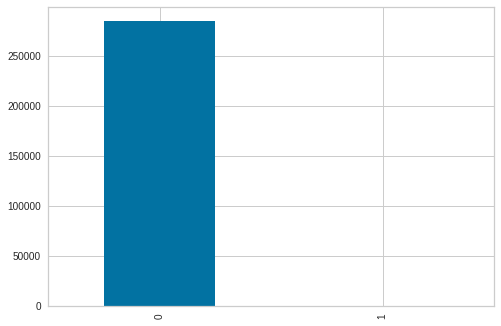

In [ ]:
df['Class'].value_counts().plot(kind='bar')

A presença de outliers nos dados também acaba por afetar a análise do histograma de transações como também o boxplot plotado em sequência.

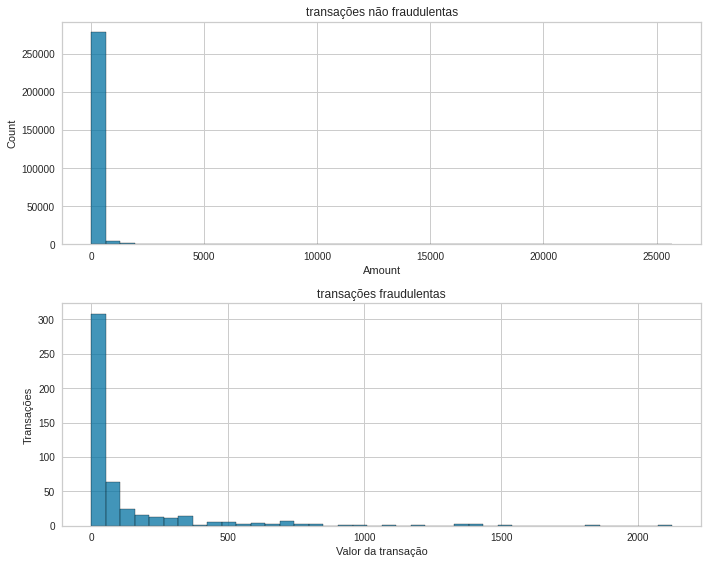

In [ ]:
fig, axes = plt.subplots(2, figsize=(10,8))

df_f=df.loc[df['Class']==1].copy()
df_n_f=df.loc[df['Class']==0].copy()
num_bins = 40

sns.histplot(df_n_f, x='Amount', ax=axes[0], bins=num_bins)
axes[0].set_title('transações não fraudulentas')

sns.histplot(df_f, x='Amount', ax=axes[1], bins=num_bins)
axes[1].set_title('transações fraudulentas')


plt.xlabel('Valor da transação')
plt.ylabel('Transações')
plt.tight_layout()

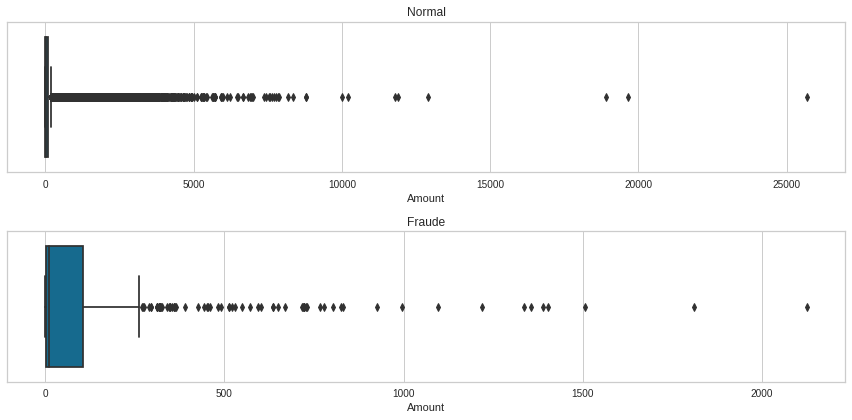

In [ ]:
fig, ax = plt.subplots(2, figsize=(12,6))
df_f=df.loc[df['Class']==1].copy()
df_n_f=df.loc[df['Class']==0].copy()

sns.boxplot(data=df_n_f, x='Amount', ax=ax[0])
#plt.ylim((-20, 2000))
ax[0].set_title("Normal")

sns.boxplot(data=df_f, x='Amount', ax=ax[1])
#plt.ylim((-20, 2000))
ax[1].set_title('Fraude')

plt.tight_layout()

In [ ]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

###Processo de retirar outliers

In [ ]:
q1=df.Amount.quantile(0.25)
q=df.Amount.quantile(0.75)
IQR_amount= q-q1
inf_amount=q1 - IQR_amount*1.5
sup_amount=q + IQR_amount*1.5
print(inf_amount, sup_amount)

-101.7475 184.5125


In [ ]:
df_out = df.drop(df[df.Amount>sup_amount].index, axis=0)

In [ ]:
df_out['Amount'].describe()

count    252903.000000
mean         34.974887
std          42.172250
min           0.000000
25%           4.490000
50%          16.000000
75%          49.990000
max         184.500000
Name: Amount, dtype: float64

O tratamento de outliers retornou dados dentro do padrão esperado, mesmo que os outliers estivessem representado dados corretos, o algoritmo de predição iria apresentar overfit, então na dúvida o melhor a se fazer é tratar.

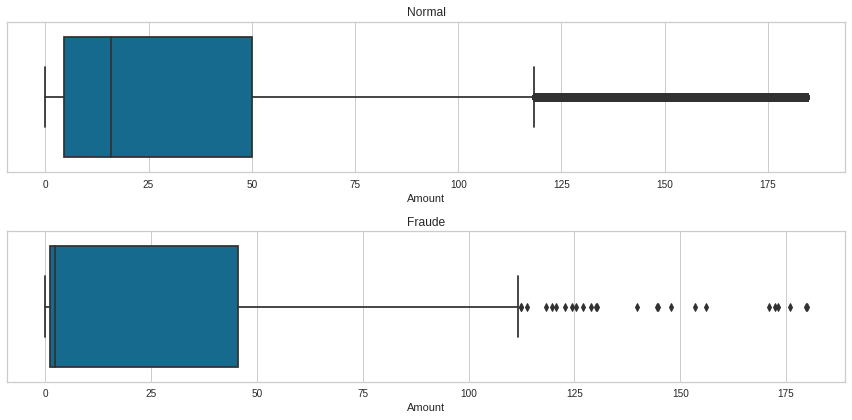

In [ ]:
fig, ax = plt.subplots(2, figsize=(12,6))
df_f=df_out.loc[df_out['Class']==1].copy()
df_n_f=df_out.loc[df_out['Class']==0].copy()

sns.boxplot(data=df_n_f, x='Amount', ax=ax[0])
#plt.ylim((-2, 200))
ax[0].set_title("Normal")

sns.boxplot(data=df_f, x='Amount', ax=ax[1])
#plt.ylim((-2, 200))
ax[1].set_title('Fraude')

plt.tight_layout()

Plotou-se dois histogramas a fim de analisar a quantidade de transações e os seus valores, não há uma discrepancia muito grande entre com e sem fraude, o que é interessante analisar é que as transações fraudulentas tem uma grande distribuição e o segundo maior pico próximos aos valores de 100, pois o primeiro está mais próximos de valores perto de 0 isso acontece tanto para transações fraudulentas quando para as não fraudulentas.

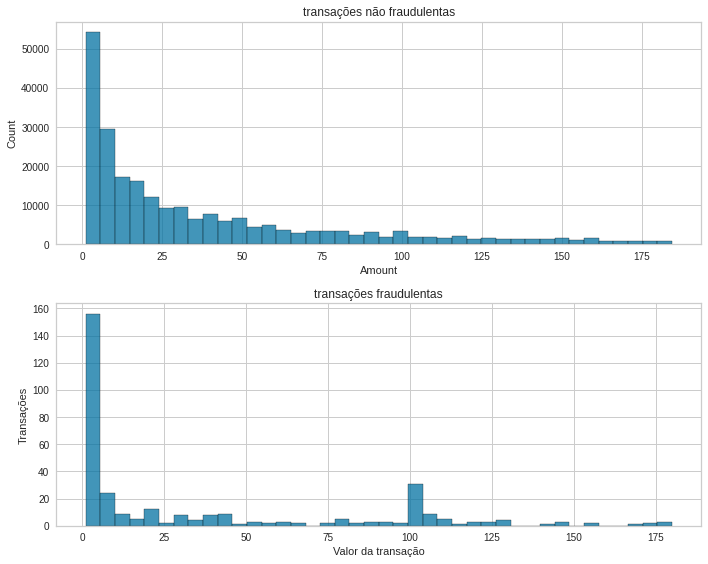

In [ ]:
fig, axes = plt.subplots(2, figsize=(10,8))

df_temp = df_out.loc[df['Amount'] >= 1].sort_values(by='Amount', ascending=True)

df_f = df_temp.loc[df_temp['Class']==1].copy()
df_n_f = df_temp.loc[df_temp['Class']==0].copy()
num_bins = 40

sns.histplot(df_n_f, x='Amount', ax=axes[0], bins=num_bins)
axes[0].set_title('transações não fraudulentas')

sns.histplot(df_f, x='Amount', ax=axes[1], bins=num_bins)
axes[1].set_title('transações fraudulentas')


plt.xlabel('Valor da transação')
plt.ylabel('Transações')
plt.tight_layout()

###Normalizar os dados

In [ ]:
scaler = StandardScaler()
df_out['Amount'] = scaler.fit_transform(df_out['Amount'].values.reshape(-1,1))
df_out['Time'] = scaler.fit_transform(df_out['Time'].values.reshape(-1,1))

df_out.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.995729,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.718502,0
1,-1.995729,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.765550,0
3,-1.995708,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,2.099136,0
4,-1.995687,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.830290,0
5,-1.995687,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.742312,0


###Balanceamento
Então agora entraremos no processo de balanceamento dos dados. 

O método que irei usar é o de NearMiss, ele reduz o volume da classe majoritária, levando  em consideração a distância dos pontos.

In [ ]:
X_b = df_out.drop("Class", axis=1)
Y_b = df_out['Class']
x_bruto_train, x_bruto_test, y_bruto_train, y_bruto_test = train_test_split(X_b, Y_b, stratify=Y_b, test_size=0.20,  shuffle=True,)

In [ ]:
X = df_out.drop("Class", axis=1)
Y = df_out['Class']

In [ ]:
rus = RandomUnderSampler()
X, y = rus.fit_sample(x_bruto_train, y_bruto_train)

In [ ]:
X.shape, y.shape

((642, 30), (642,))

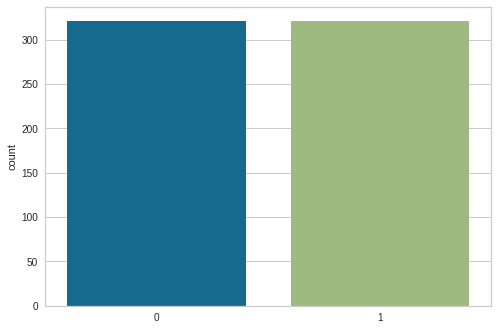

In [ ]:
ax = sns.countplot(x=y)

In [ ]:
#separando os dados para o treino do modelo
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20,  shuffle=True,)

In [ ]:
print("treino: ",x_train.shape, y_train.shape)
print("test: ",x_test.shape, y_test.shape)

treino:  (513, 30) (513,)
test:  (129, 30) (129,)


##Modelagem de Machine Learning

Após a analise exploratória feita e iremos fazer a predição com machine learning para dado iremos usar três modelos difenrentes para a análise, regressão logistica, Naive Bayes e Arvore de descisão.

###Regressão Logística

A regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias

In [ ]:
#treino do modelo
model = LogisticRegression()
model.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = model.predict(x_bruto_test)
accuracy_score(y_bruto_test, pred)

0.9795180008303513

In [ ]:
print(classification_report(y_bruto_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50501
           1       0.07      0.90      0.12        80

    accuracy                           0.98     50581
   macro avg       0.53      0.94      0.56     50581
weighted avg       1.00      0.98      0.99     50581



0.9795180008303513

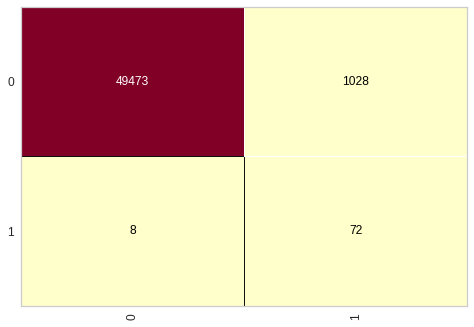

In [ ]:
cm = ConfusionMatrix(model)
cm.fit(X, y)
cm.score(x_bruto_test, y_bruto_test)

A quantidade de falsos negativo (algoritmo previu não fraude porém é fraude) foram apenas de **8** ocorrencias. Comparando com os valores de falso positivo (algoritmo disse que é fraude mas na verdade não é) de **1028** ocorrecias

Ou seja na prática esse modelo está definindo como falsos casos fraudulentos em uma razão de **1028 ocorrencias para 50501**. 

Partindo de uma visão otimista essa situação é melhor do que se ele tivesse tomando como falsos negativos pois dai o algoritmo estaria deixando passar vários casos de fraudes reais achando que são casos não fraudulentas. 

###Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X, y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
prev_naive = naive_bayes.predict(x_bruto_test)
accuracy_score(y_bruto_test, prev_naive)

0.9714912714260295

In [ ]:
print(classification_report(y_bruto_test, prev_naive))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     50501
           1       0.05      0.89      0.09        80

    accuracy                           0.97     50581
   macro avg       0.52      0.93      0.54     50581
weighted avg       1.00      0.97      0.98     50581



0.9714912714260295

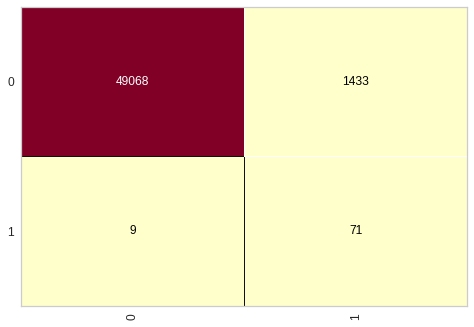

In [ ]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X, y)
cm.score(x_bruto_test, y_bruto_test)



*   Quantidade de falso positivo aumentou quando comparado com o primeiro modelo, Regressão Logistica, **1433 contra 1028**, apenas para título de refoso falso positivo é quando o código detectar a fransação como fraude porém ela na verdade não era fraude. 
*   A quantidade de falsos negativos se manteve muito próxima a anterior apenas **9** detecções. Sobrando apenas **71** detecções, corretas, de transações fraudulentas das **80** amostras 



###Árvore de decisão

In [ ]:
modelo_arv = DecisionTreeClassifier(criterion='entropy', random_state=0)
modelo_arv.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
prev = modelo_arv.predict(x_bruto_test)
accuracy_score(y_bruto_test, prev)

0.9292224353017932

In [ ]:
print(classification_report(y_bruto_test, prev))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96     50501
           1       0.02      0.90      0.04        80

    accuracy                           0.93     50581
   macro avg       0.51      0.91      0.50     50581
weighted avg       1.00      0.93      0.96     50581



0.9292224353017932

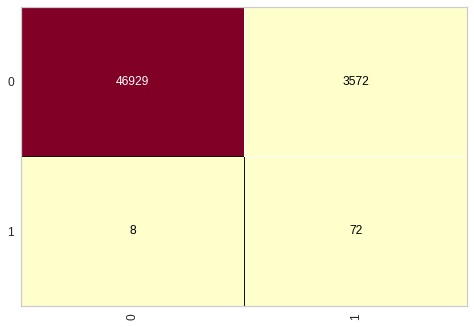

In [ ]:
cm = ConfusionMatrix(modelo_arv)
cm.fit(X, y)
cm.score(x_bruto_test, y_bruto_test)



*   O comportamento do modelo de Árvore de decisão foi muito parecido com o modelo de regressão. A diferença ficou para os **falsos positivos** no qual o modelo em questão identificou de **50501** amostras **3572** delas como sendo falso positivo 



##Conclusão

Os resultados obtidos até aqui se mostraram bem satisfatórios, para o conjunto de dados que nos foi fornecido, uma vez que para o cliente de um banco é mais vantajoso ter seu cartão bloqueado por uma compra que ele mesmo vez **(falso positivo)** do que por uma fraude real de fato, isso mostra que o algoritmo de detecção de fraudes do banco é precavido e provavelmente o cliente acabe por uma notificação do banco perguntando sobre uma compra suspeita que na verdade foi o próprio cliente que fez.

Vale resaltar que esse é apenas um projeto usando dados públicos disponibilizados no Kaggle os quais foram obtidos em um curto período de tempo estando desbalanceados e com transformações PCA.

Na opinião do autor o modelo de **Regressão Logistica** se saiu superior quanto aos outros modelos usados.